## ASSIGNMENT 3

In [94]:
pip install -U scikit-learn

# Pre Importing 

In [95]:
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Question 1

In [96]:
df1 = pd.read_csv('diabetes.csv')
df1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df1.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [98]:
c_mean=df1.mean(axis=0).to_list()

c_median=df1.median(axis=0).to_list()


In [99]:
bmi_labels = ['Underweight','Normal', 'Overweight', 'Obese']
cut_bins = [0,18.5, 24.9, 29.9, df1["BMI"].max()]
df1['bmi_label'] = pd.cut(df1['BMI'], bins=cut_bins, labels=bmi_labels)

In [100]:
df1.to_csv('diabetes1.csv', index=False)

# Question 2

In [101]:
df1 = pd.read_csv('diabetes.csv')


MinMaxScaler


In [102]:
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
    return df

scaled_bp = scaleColumns(df1, ['BloodPressure'])

In [103]:
scaled_bp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0.590164,35,0,33.6,0.627,50,1
1,1,85,0.540984,29,0,26.6,0.351,31,0
2,8,183,0.524590,0,0,23.3,0.672,32,1
3,1,89,0.540984,23,94,28.1,0.167,21,0
4,0,137,0.327869,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,0.622951,48,180,32.9,0.171,63,0
764,2,122,0.573770,27,0,36.8,0.340,27,0
765,5,121,0.590164,23,112,26.2,0.245,30,0
766,1,126,0.491803,0,0,30.1,0.349,47,1


Standared Scaler 

In [104]:
scaler=StandardScaler()
# scaled_bmi=scaler.fit(df1[['BMI']])
# scaled_bmi=scaler.transform(df1[['BMI']])

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
    return df
scaled_bmi=scaleColumns(df1, ['BMI'])

In [105]:
scaled_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0.590164,35,0,0.204013,0.627,50,1
1,1,85,0.540984,29,0,-0.684422,0.351,31,0
2,8,183,0.524590,0,0,-1.103255,0.672,32,1
3,1,89,0.540984,23,94,-0.494043,0.167,21,0
4,0,137,0.327869,35,168,1.409746,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,0.622951,48,180,0.115169,0.171,63,0
764,2,122,0.573770,27,0,0.610154,0.340,27,0
765,5,121,0.590164,23,112,-0.735190,0.245,30,0
766,1,126,0.491803,0,0,-0.240205,0.349,47,1


In [106]:
scaler = preprocessing.MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
    return df

scaled_age = scaleColumns(df1,['Age'])

In [107]:
scaled_age.to_csv('diabetesedited .csv', index=False)

In [108]:
df_org = pd.read_csv('diabetes.csv')
df1 = pd.read_csv('diabetesedited .csv')

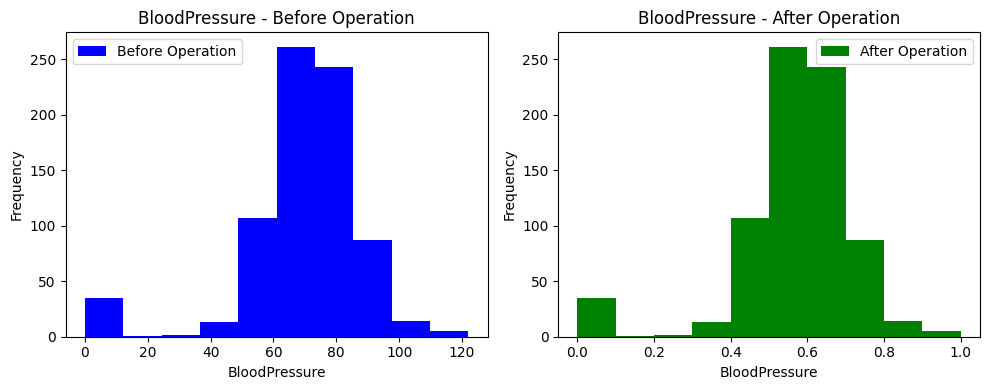

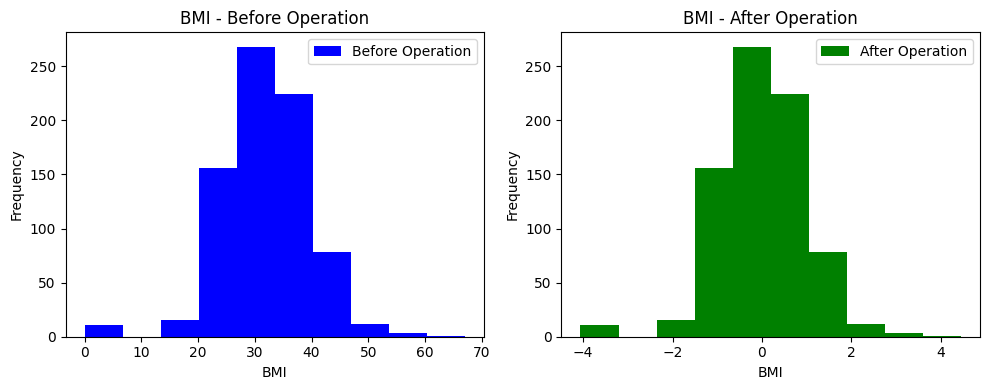

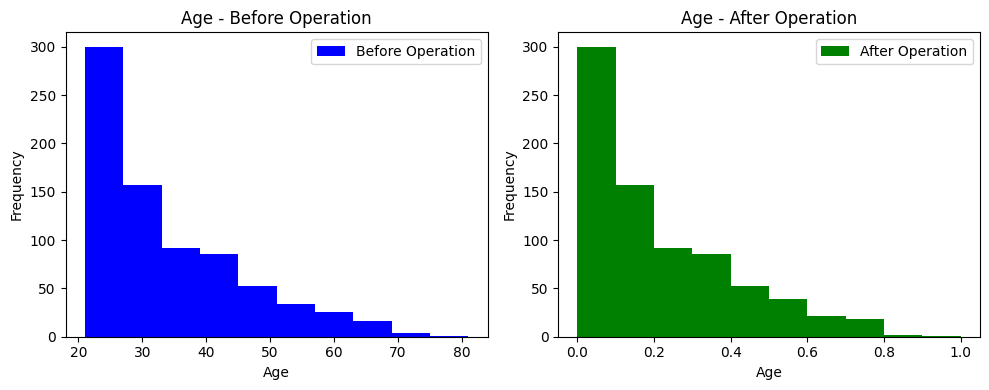

In [114]:

columns = ['BloodPressure', 'BMI', 'Age']

for col in columns:
    plt.figure(figsize=(10, 4))
    
    # Plotting original dataframe
    plt.subplot(1, 2, 1)
    plt.hist(df_org[col], label='Before Operation', color='blue')
    plt.title(f'{col} - Before Operation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Plotting edited dataframe
    plt.subplot(1, 2, 2)
    plt.hist(df1[col], label='After Operation', color='green')
    plt.title(f'{col} - After Operation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Question 3


In [117]:
from sklearn.pipeline import Pipeline
df1 = pd.read_csv('diabetes.csv')
pipe = Pipeline([
        ('scale', StandardScaler())])
pipe.fit_transform(df1[['BloodPressure', 'BMI', 'Age']])

array([[ 0.14964075,  0.20401277,  1.4259954 ],
       [-0.16054575, -0.68442195, -0.19067191],
       [-0.26394125, -1.10325546, -0.10558415],
       ...,
       [ 0.14964075, -0.73518964, -0.27575966],
       [-0.47073225, -0.24020459,  1.17073215],
       [ 0.04624525, -0.20212881, -0.87137393]])

In [118]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.

## Question 5

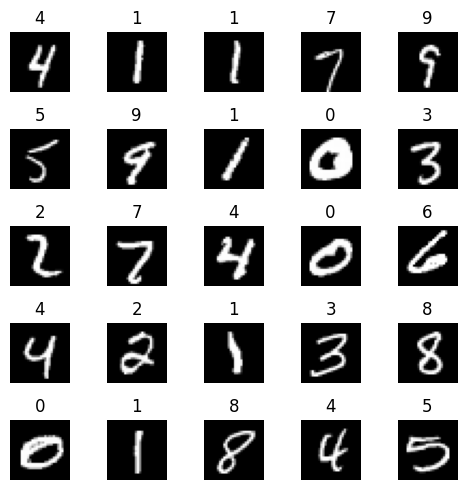

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range(25):
    idx = np.random.randint(0, train_images.shape[0])
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(train_labels[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [127]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

print("Original label:", [train_labels])
print("One-hot encoded label:", train_labels_one_hot)


Original label: [5 0 4 ... 5 6 8]
One-hot encoded label: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## Question 5


In [130]:
df2 = pd.read_csv('Q5.csv')

In [132]:
df2.head(20)

,X,Y,Output
0,17.151894,120.552675,0
1,14.375872,178.354600,0
2,15.288949,113.608912,0
3,-19.797816,-166.523969,1
4,17.991586,92.295872,0
5,11.433533,188.933783,0
6,NaN,NaN,1
7,16.120957,123.386799,0
8,NaN,NaN,1
9,-16.418478,-150.137228,1


In [133]:
df2=df2.dropna()

In [134]:
df2.head(20)

,X,Y,Output
0,17.151894,120.552675,0
1,14.375872,178.354600,0
2,15.288949,113.608912,0
3,-19.797816,-166.523969,1
4,17.991586,92.295872,0
5,11.433533,188.933783,0
7,16.120957,123.386799,0
9,-16.418478,-150.137228,1
10,-13.657259,-191.789854,1
11,15.818503,82.873718,0


In [136]:
#count NaN values in each column    
print(df2.isnull().sum())

X         0
Y         0
Output    0
dtype: int64


In [137]:
x=df2["X"].to_numpy()
y=df2["Y"].to_numpy()



In [138]:
def sigmoid(x):
	return(1/(1 + np.exp(-x)))


In [139]:
def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

In [ ]:
f_forward